In [27]:
import pandas as pd
import numpy as np
from os import path
from CSVUtils import *
import ta
import matplotlib.pyplot as plt
import seaborn as sn

In [39]:
DIR = "./input/yahoo"
nameList = ["^GSPC", "^GDAXI", "^HSI"]
trainStartDate = pd.to_datetime("2000-01-01")
trainEndDate = pd.to_datetime("2014-12-31")
testStartDate = pd.to_datetime("2015-01-01")
testEndDate = pd.to_datetime("2019-12-31")

# for name in nameList:
df = csv2df(csv_path=DIR, csv_name=nameList[2]+".csv", source="yahoo")

In [40]:
df['Future_Price_7d'] = df.Price.shift(-7)
df['Future_Price_30d'] = df.Price.shift(-30)
df['Date'] = pd.to_datetime(df['Date'])
df.dropna(inplace=True)

df['Change_7d'] = (df['Future_Price_7d'] - df['Price'])/df['Price']
df['Change_30d'] = (df['Future_Price_30d'] - df['Price'])/df['Price']
df.fillna(0, inplace=True)

bins = [-np.inf, -0.1, -0.01, 0.01, 0.1, np.inf]
labels=['Strong Bear','Weak Bear','Horizontal','Weak Bull', 'Strong Bull']
df['Cat_7d'] = pd.cut(df['Change_7d'], bins=bins, labels=labels)
df['Cat_30d'] = pd.cut(df['Change_30d'], bins=bins, labels=labels)

In [41]:
df = ta.add_all_ta_features(
    df, open="Open", high="High", low="Low", close="Price", volume="Vol")

In [42]:
future_cols = ['Future_Price_7d', 'Future_Price_30d', 'Cat_7d', 'Cat_30d', "Cat_Int_7d", "Cat_Int_30d", 'Change_7d', 'Change_30d']
target_cols = ["Cat_Int_7d", "Cat_Int_30d", 'Future_Price_7d', 'Future_Price_30d']
data_cols = [col for col in list(df.columns) if col not in future_cols]
df[data_cols] = df[data_cols].fillna(0)
data_cols.remove('Date')

In [43]:
df_backup = df.copy()
# df[data_cols] = df[data_cols]/df[data_cols].max()
df[data_cols] = df[data_cols].replace([np.inf, -np.inf], np.nan)
df[data_cols] = df[data_cols].fillna(0)

In [44]:
train_df = df[(df['Date'] >= trainStartDate) & (df['Date'] <= trainEndDate)]
test_df = df[(df['Date'] >= testStartDate) & (df['Date'] <= testEndDate)]

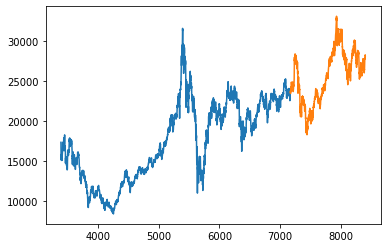

In [45]:
plt.plot(train_df.Price)
plt.plot(test_df.Price)

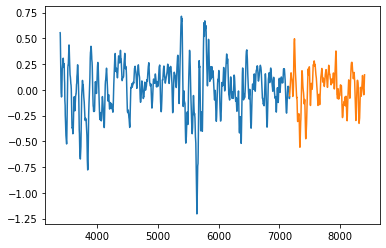

In [46]:
plt.plot(train_df.trend_trix)
plt.plot(test_df.trend_trix)

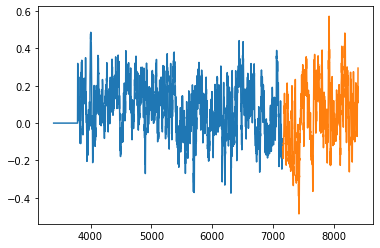

In [47]:
plt.plot(train_df.volume_cmf)
plt.plot(test_df.volume_cmf)

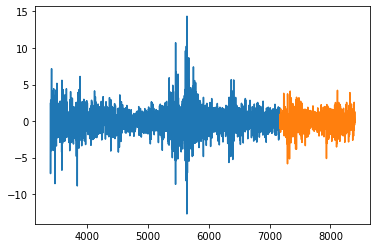

In [48]:
plt.plot(train_df.others_dr)
plt.plot(test_df.others_dr)

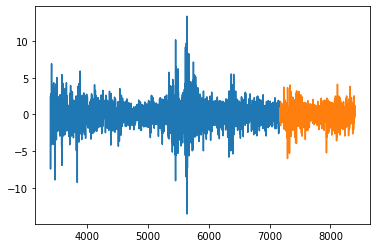

In [49]:
plt.plot(train_df.others_dlr)
plt.plot(test_df.others_dlr)